In [ ]:
!pip install pandas numpy matplotlib seaborn IPython scikit-learn xgboost lightgbm catboost optuna shap

# 1. Imports and Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import optuna
import shap

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 2. Load and Explore Dataset

In [ ]:
# Use wget to download the CSV file from Google Sheets
!wget --output-file="logs.txt" "https://docs.google.com/spreadsheets/d/1PTM7FXIquDzxf30Yd-e0pS6CER6uh4v9KbBTkzv3a1w/export?format=csv" -O "train.csv"

# Define the path to the downloaded CSV file
url = 'train.csv'

# Read the CSV file into a DataFrame
try:
    train_data = pd.read_csv(url)
    print(train_data.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2          1               0        181449.97   
1       0.00              2          1               1         49503.50   
2       0.00              2          1               0        184866.69   
3  148882.54              1          1               1         84560.88   
4       0.00              2          1               1         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [ ]:
# Use wget to download the CSV file from Google Sheets
!wget --output-file="logs.txt" "https://docs.google.com/spreadsheets/d/1m2Y_w7DIuJEE4q2PIfPj3sDTfbjkBuhs3CVNpr0IJ6U/export?format=csv" -O "test.csv"

# Define the path to the downloaded CSV file
url = 'test.csv'

# Read the CSV file into a DataFrame
try:
    test_data = pd.read_csv(url)
    print(test_data.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")


       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2          0               1        160976.75  
1       0.00              1          1               0         72549.27  
2       0.00              2          1               0        138882.09  
3       0.00              1          1               0        113931.57  
4  121263.62              1          1               0        139431.00  


In [ ]:
print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)

Train shape: (165034, 14)
Test shape: (110023, 13)


In [ ]:
# Check the shape of the dataset
print('Train dataset size:', train_data.shape)
print('Test dataset size:', test_data.shape)

Train dataset size: (165034, 14)
Test dataset size: (110023, 13)


In [ ]:
display(train_data.head())
display(test_data.head())

id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2          1               0        181449.97   
1       0.00              2          1               1         49503.50   
2       0.00              2          1               0        184866.69   
3  148882.54              1          1               1         84560.88   
4       0.00              2          1               1         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4       0

id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2          0               1        160976.75  
1       0.00              1          1               0         72549.27  
2       0.00              2          1               0        138882.09  
3       0.00              1          1               0        113931.57  
4  121263.62              1          1               0        139431.00

In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int64  
 11  IsActiveMember   165034 non-null  int64  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.6+ MB
None


# 3. Data Cleaning

In [ ]:
print(f'Missing values: {train_data.isna().sum().sum()}')
print(f'Duplicated values: {train_data.duplicated().sum()}')

print(f'Missing values: {test_data.isna().sum().sum()}')
print(f'Duplicated values: {test_data.duplicated().sum()}')

Missing values: 0
Duplicated values: 0
Missing values: 0
Duplicated values: 0


## 4. Exploratory Data Analysis (EDA)

## 4.1 Univariate Analysis

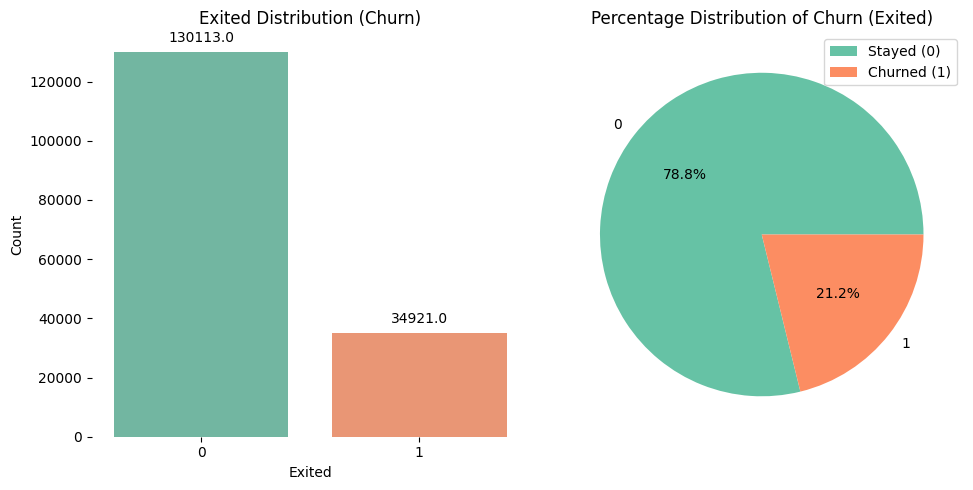

In [ ]:
# Create subplots for Exited feature
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
exited_counts = train_data['Exited'].value_counts()
sns.barplot(x=exited_counts.index, y=exited_counts, ax=axes[0], palette='Set2')
axes[0].set_title('Exited Distribution (Churn)')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
sns.despine(left=True, bottom=True)

exited_percentage = train_data['Exited'].value_counts(normalize=True) * 100
axes[1].pie(exited_percentage, labels=exited_percentage.index, autopct='%1.1f%%',
            colors=sns.color_palette('Set2'))
axes[1].set_title('Percentage Distribution of Churn (Exited)')
plt.legend(['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

**Insights from the visualizations:**
  - The majority of customers did **not churn** (Exited = 0).
  - A smaller proportion, around **21%**, churned (Exited = 1).
  - **79.0%** of customers stayed with the bank.
  - **21.0%** of customers churned.

This confirms an **imbalance** in the dataset, where non-churned customers significantly outnumber churned customers.

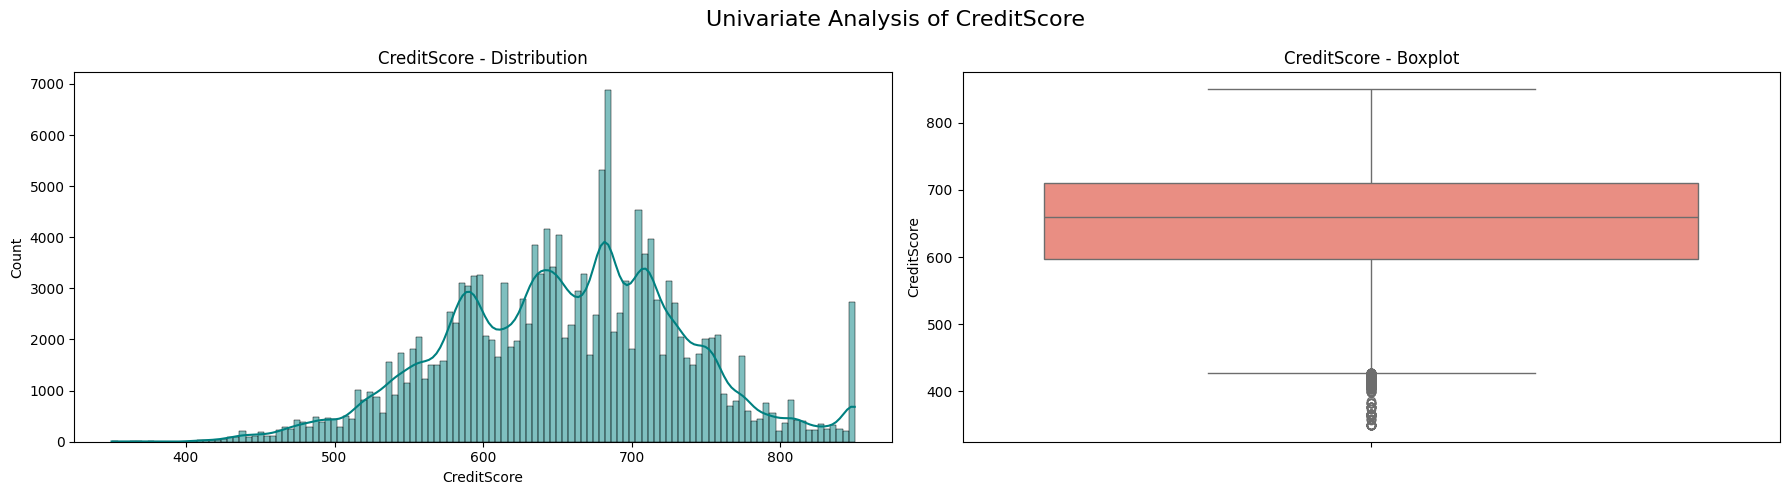

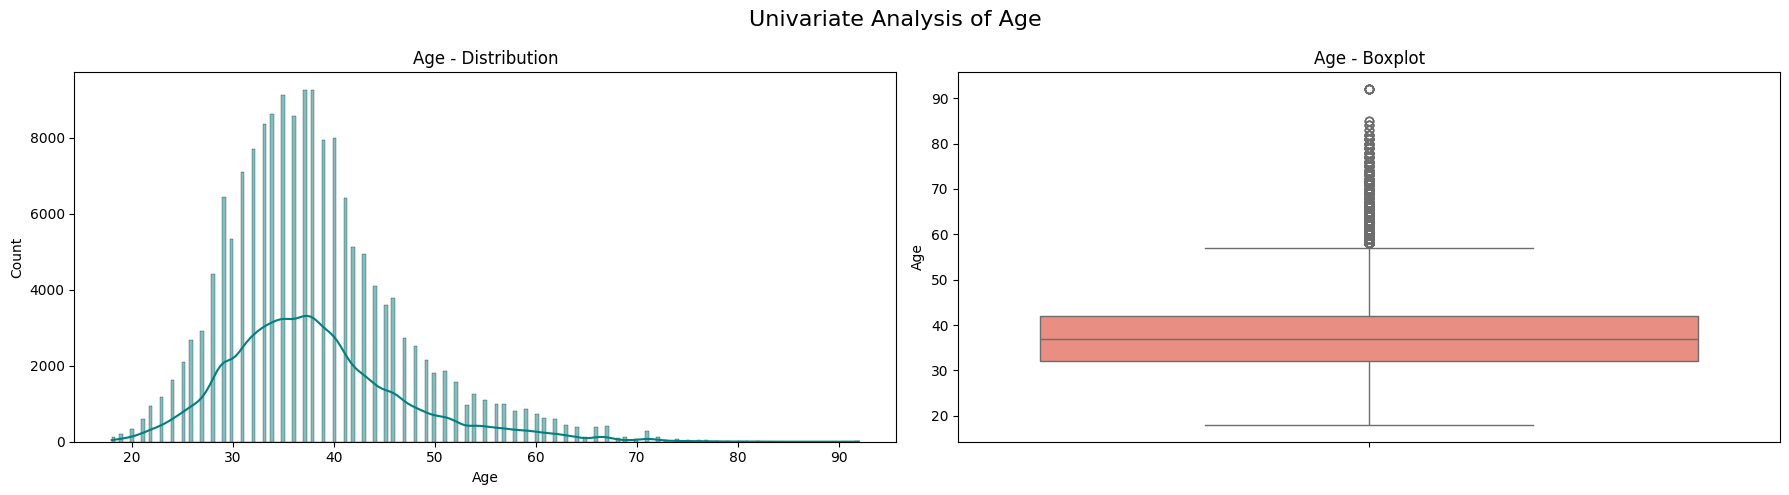

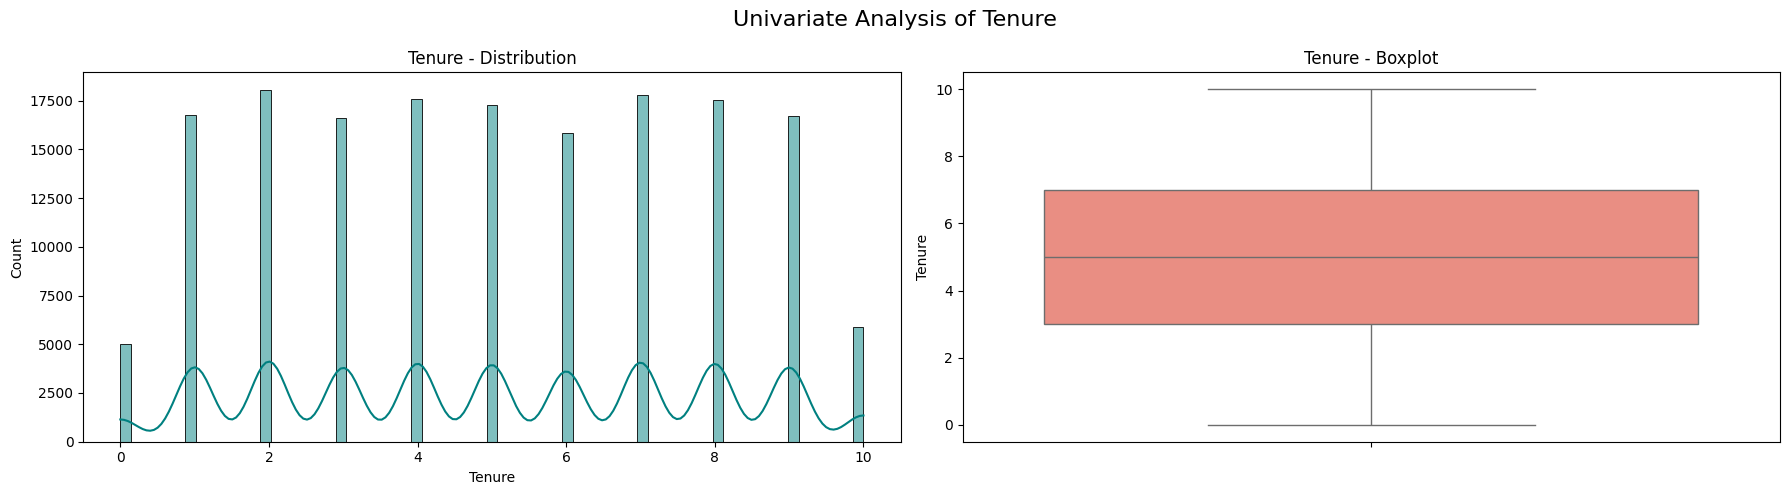

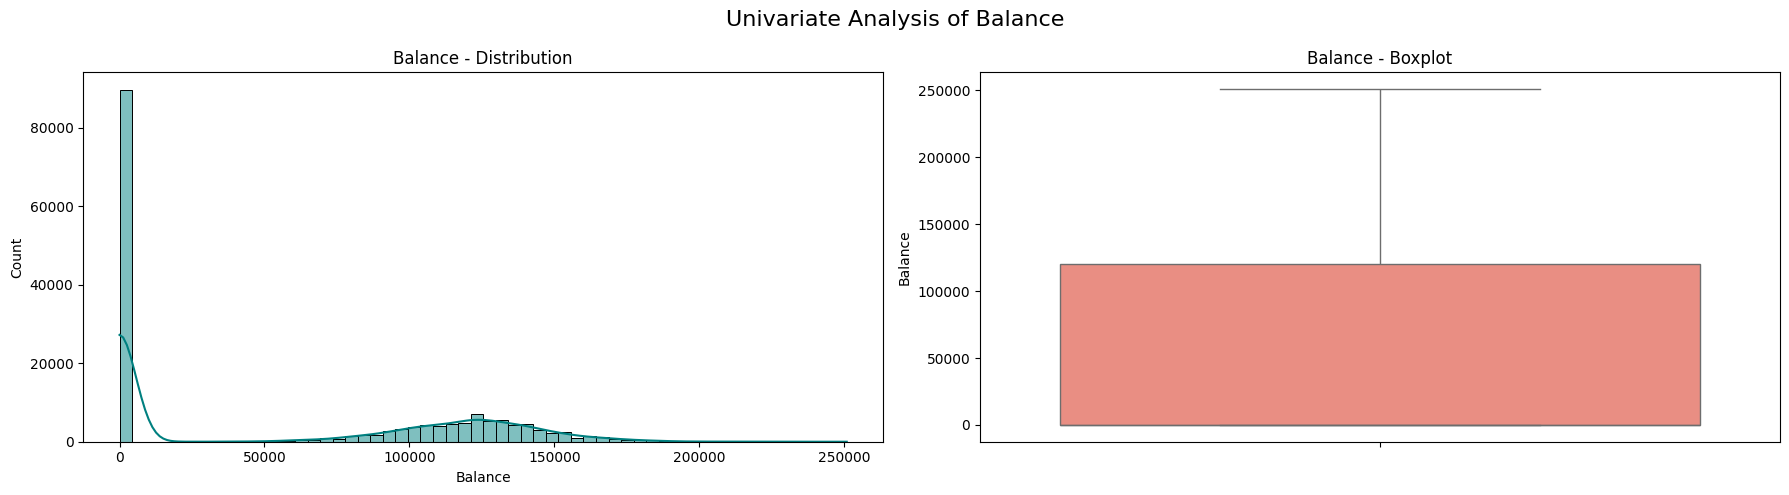

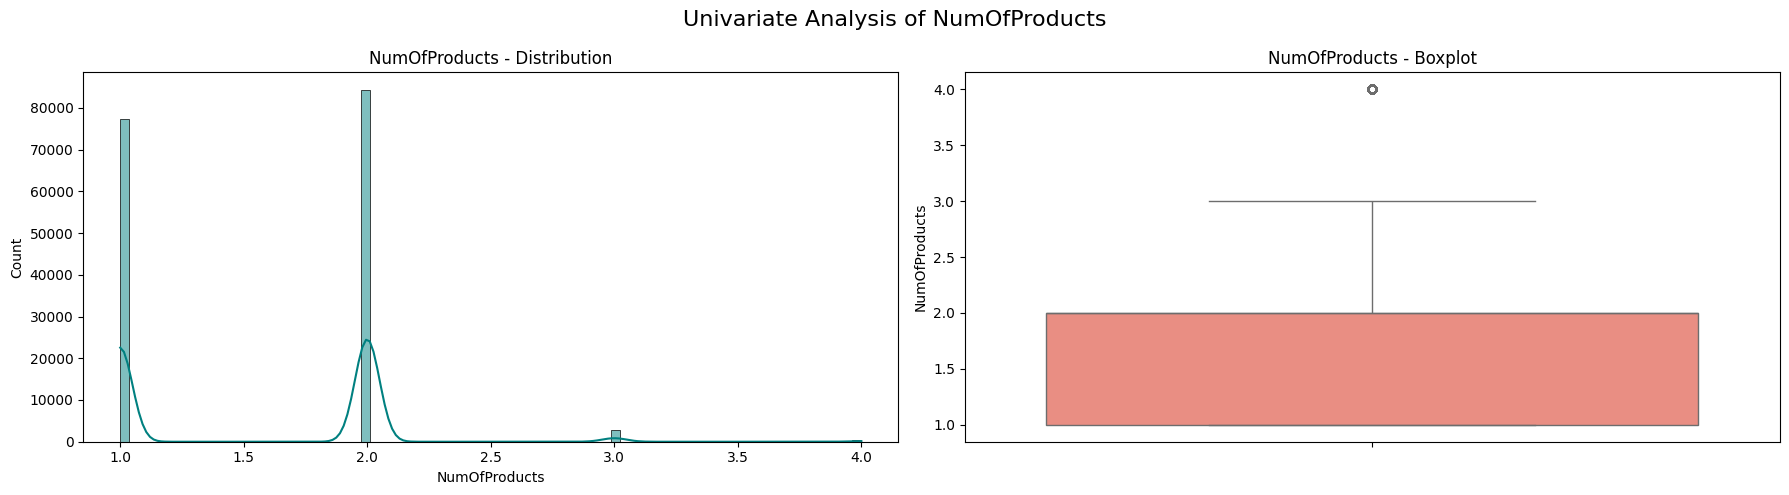

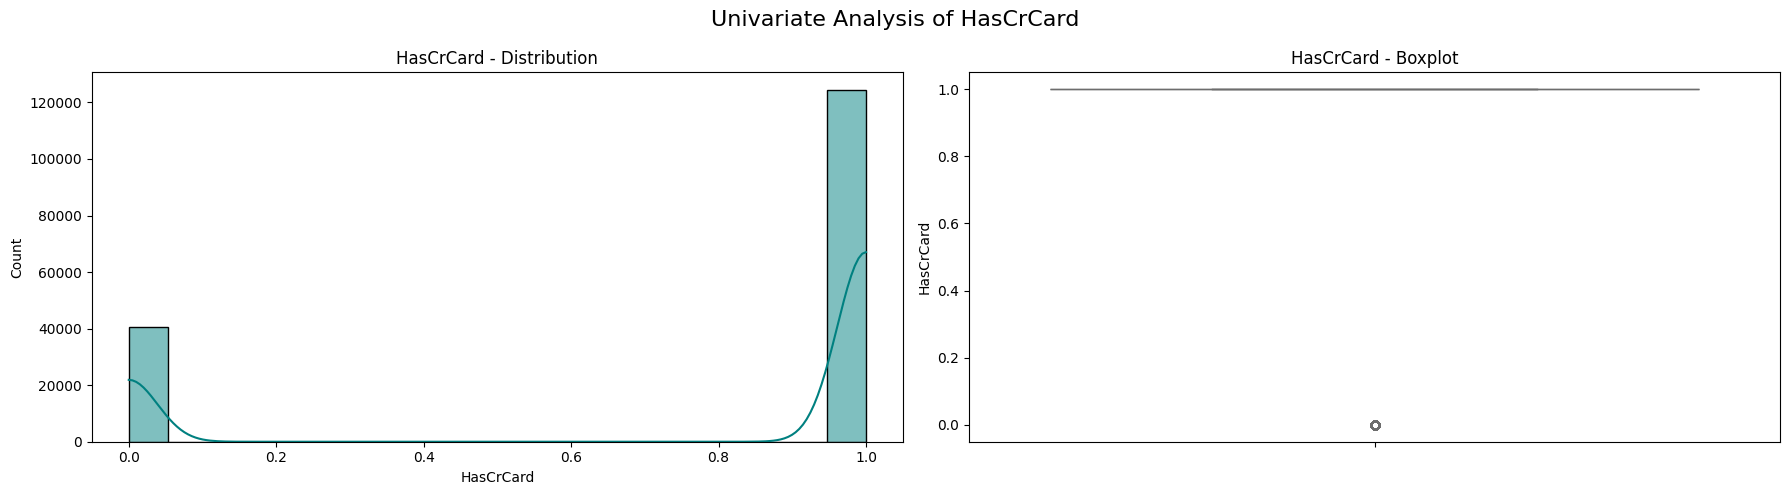

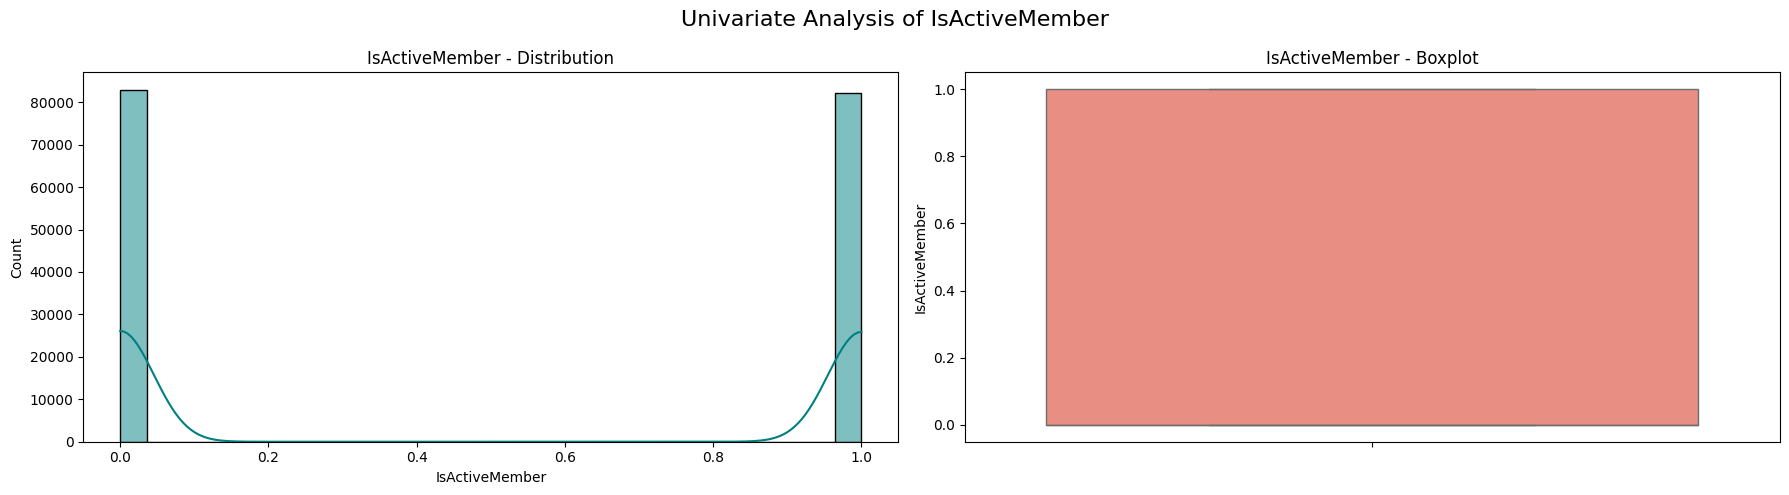

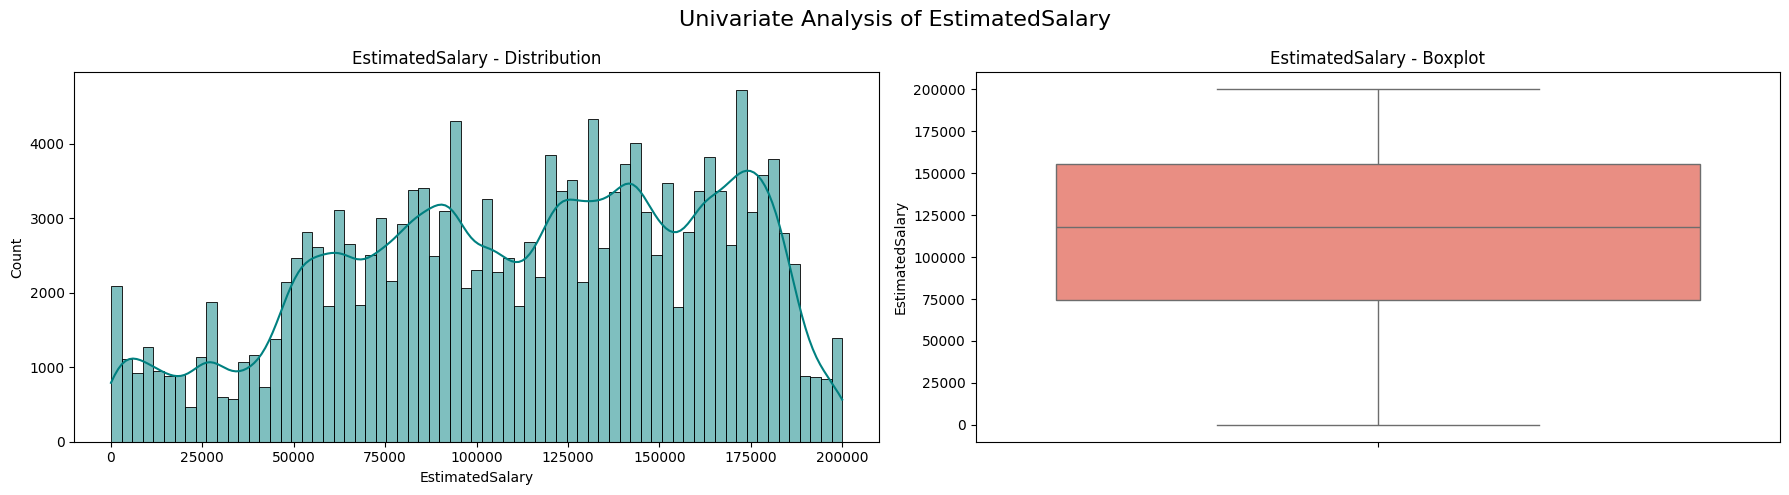

In [ ]:
# Function to perform univariate analysis with added colors
def univariate_analysis_with_colors(columns, train_data):
    for column in columns:
        fig, axes = plt.subplots(1, 2, figsize=(18, 5))
        fig.suptitle(f'Univariate Analysis of {column}', fontsize=16)

        sns.histplot(train_data[column], kde=True, ax=axes[0], color='teal')
        axes[0].set_title(f'{column} - Distribution')

        sns.boxplot(y=train_data[column], ax=axes[1], color='salmon')
        axes[1].set_title(f'{column} - Boxplot')

        plt.tight_layout()
        plt.show()

columns_to_analyze = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary'
]

univariate_analysis_with_colors(columns_to_analyze, train_data)


**Insights from the visualizations:**

1. **Credit Score**:
   - A normal-like distribution centered around 650.
   - Outliers are present on both ends of the distribution.

2. **Age**:
   - Most customers are between 30 and 40 years old.
   - A few customers are outliers aged above 80.

3. **Tenure**:
   - Tenure ranges from 0 to 10 years, with a uniform spread across values.

4. **Balance**:
   - Many customers have a balance of 0, indicating low account usage.
   - Some have significantly high balances, appearing as outliers.

5. **Number of Products**:
   - Most customers have either 1 or 2 products.
   - A small number have more than 2 products.

6. **Has Credit Card (Binary)**:
   - Around 75% of customers possess a credit card.

7. **Is Active Member (Binary)**:
   - The active and inactive members are distributed almost evenly.

8. **Estimated Salary**:
   - The salary distribution is fairly uniform, with no significant outliers.

In [ ]:
train_data.describe().T

count          mean           std          min  \
id               165034.0  8.251650e+04  47641.356500         0.00   
CustomerId       165034.0  1.569201e+07  71397.816791  15565701.00   
CreditScore      165034.0  6.564544e+02     80.103340       350.00   
Age              165034.0  3.812589e+01      8.867205        18.00   
Tenure           165034.0  5.020353e+00      2.806159         0.00   
Balance          165034.0  5.547809e+04  62817.663278         0.00   
NumOfProducts    165034.0  1.554455e+00      0.547154         1.00   
HasCrCard        165034.0  7.539537e-01      0.430707         0.00   
IsActiveMember   165034.0  4.977702e-01      0.499997         0.00   
EstimatedSalary  165034.0  1.125748e+05  50292.865585        11.58   
Exited           165034.0  2.115988e-01      0.408443         0.00   

                         25%         50%           75%          max  
id                  41258.25     82516.5  1.237748e+05    165033.00  
CustomerId       15633141.00  15690169.0  1.575682e+07  15815690.00  
CreditScore           597.00       659.0  7.100000e+02       850.00  
Age                    32.00        37.0  4.200000e+01        92.00  
Tenure                  3.00         5.0  7.000000e+00        10.00  
Balance                 0.00         0.0  1.199395e+05    250898.09  
NumOfProducts           1.00         2.0  2.000000e+00         4.00  
HasCrCard               1.00         1.0  1.000000e+00         1.00  
IsActiveMember          0.00         0.0  1.000000e+00         1.00  
EstimatedSalary     74637.57    117948.0  1.551525e+05    199992.48  
Exited                  0.00         0.0  0.000000e+00         1.00

In [ ]:
def plot_categorical_distribution(column_name, data=train_data):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=train_data, palette='Set2')
    plt.title(f'Distribution of {column_name}')

    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2),
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')

    sns.despine(left=True, bottom=True)

    plt.subplot(1, 2, 2)
    train_data[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90, explode=[0.05]*train_data[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

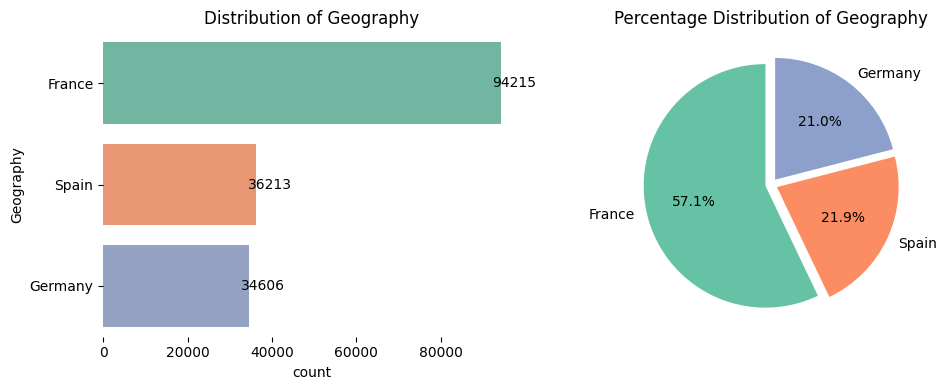

In [ ]:
# Plotting for 'Geography'
plot_categorical_distribution('Geography')

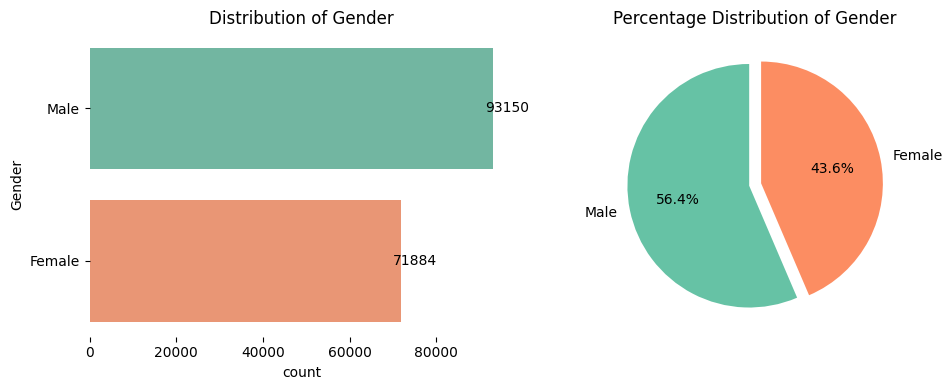

In [ ]:
# Plotting for 'Gender'
plot_categorical_distribution('Gender')

**Insights from the visualizations:**

### **Geography:**
- Most customers are from **France**, followed by **Germany** and **Spain**.
- **Percentage**:  
  - **France**: Majority of customers (~50%)  
  - **Germany**: ~25%  
  - **Spain**: ~25%

### **Gender:**
- The number of male and female customers is fairly balanced.
- **Percentage**:  
  - **Female**: ~51%  
  - **Male**: ~49%


## 4.2 Bivariate Analysis

In [ ]:
# Create a crosstab of Geography and Exited
contingency_table = pd.crosstab(train_data['Geography'], train_data['Exited'])

# Display the crosstab
print(contingency_table)

Exited         0      1
Geography              
France     78643  15572
Germany    21492  13114
Spain      29978   6235


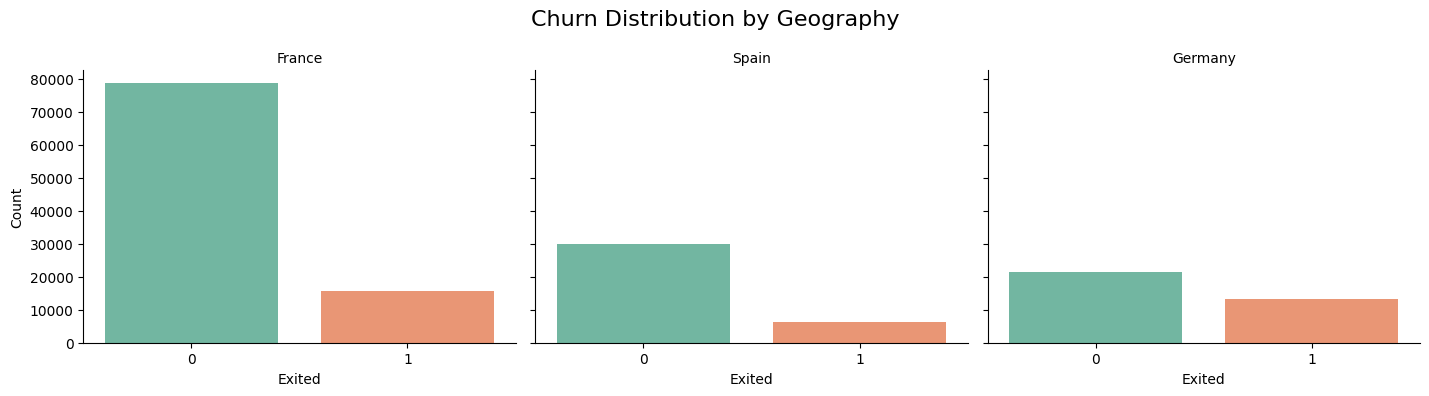

In [ ]:
# Create a FacetGrid to visualize Geography by Exited
g = sns.FacetGrid(train_data, col='Geography', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Geography', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Create a crosstab of Gender and Exited
contingency_table = pd.crosstab(train_data['Gender'], train_data['Exited'])

# Display the crosstab
print(contingency_table)

Exited      0      1
Gender              
Female  51779  20105
Male    78334  14816


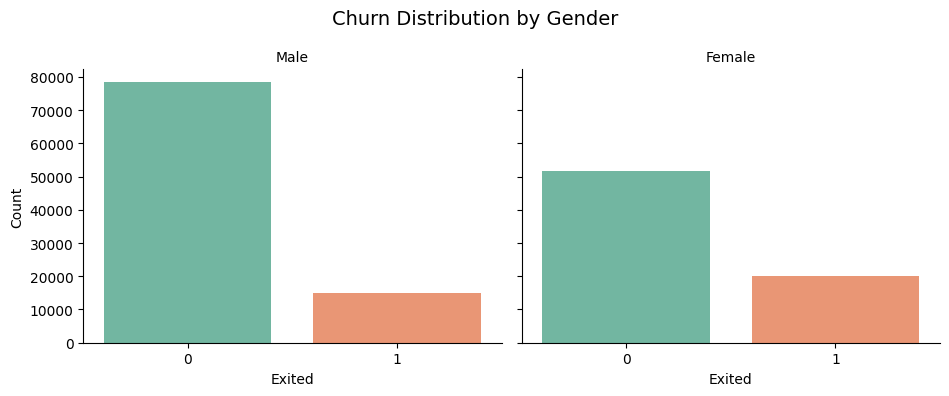

In [ ]:
# Create a FacetGrid to visualize Gender by Exited
g = sns.FacetGrid(train_data, col='Gender', height=4, aspect=1.2)

g.map(sns.countplot, 'Exited', palette='Set2')
g.set_titles("{col_name}")
g.set_axis_labels("Exited", "Count")
g.fig.suptitle('Churn Distribution by Gender', fontsize=14)
plt.tight_layout()
plt.show()

**Insights:**

**Geography vs. Exited:**
  - **Germany** has a relatively higher proportion of churn compared to Spain and France.
  - **France** has the most customers, but the churn proportion seems lower compared to Germany.

**Gender vs. Exited:**
  - The **churn rate is higher among females** compared to males.
  - Even though there are slightly fewer female customers, they have a higher tendency to churn.

This analysis suggests that **geography** and **gender** are important features to consider in predicting churn. Germany and female customers might need focused strategies to reduce churn.

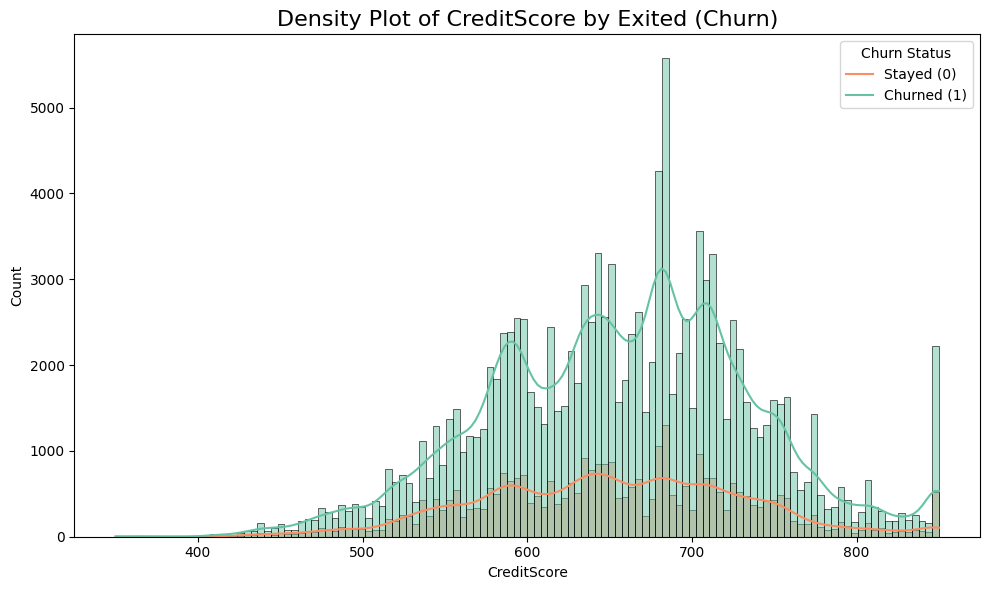

In [ ]:
# Create a histplot for CreditScore by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='CreditScore', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of CreditScore by Exited (Churn)', fontsize=16)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

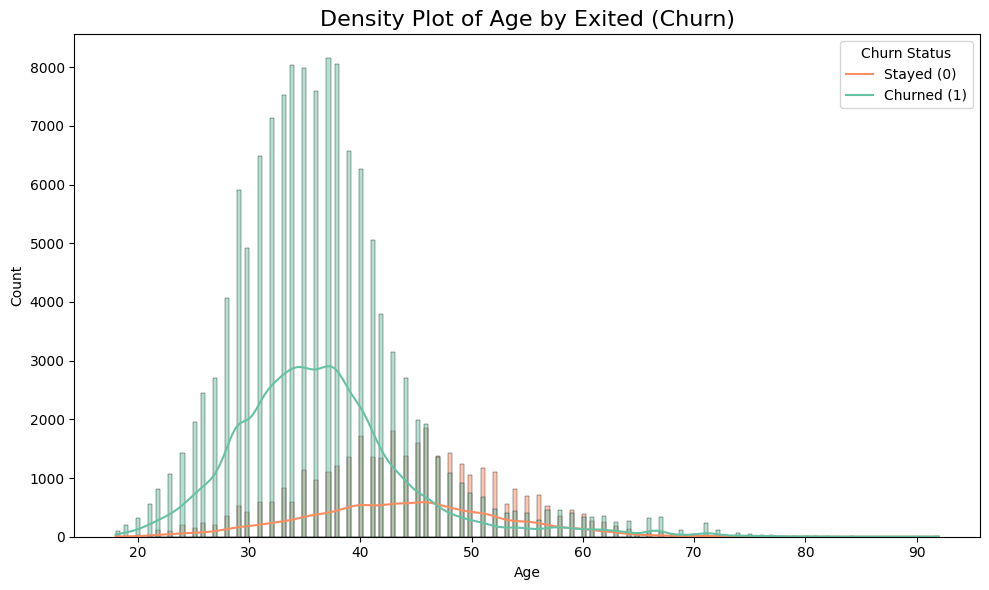

In [ ]:
# Create a histplot for Age by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Age by Exited (Churn)', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

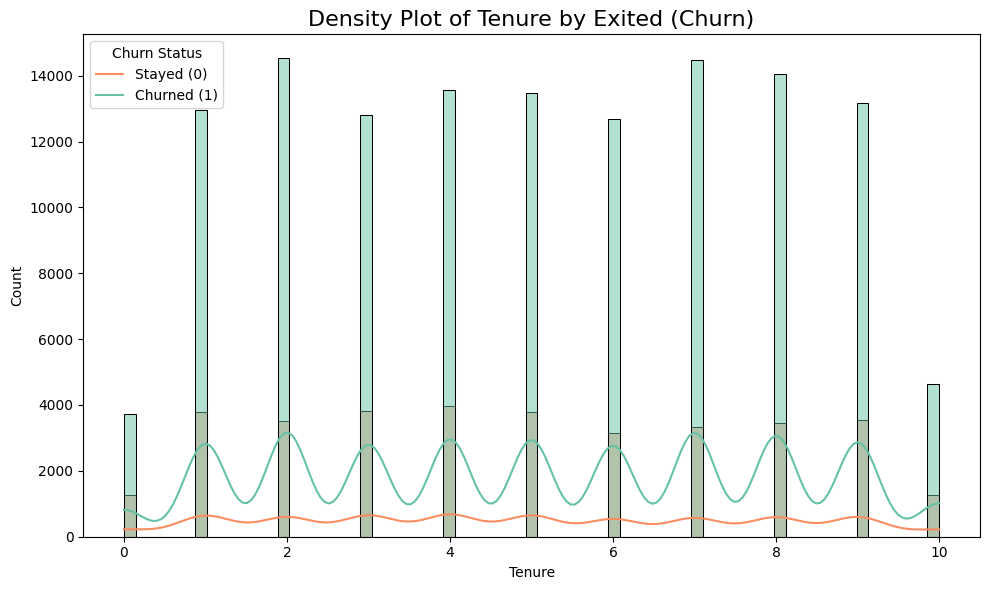

In [ ]:
# Create a histplot for Tenure by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Tenure', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Tenure by Exited (Churn)', fontsize=16)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

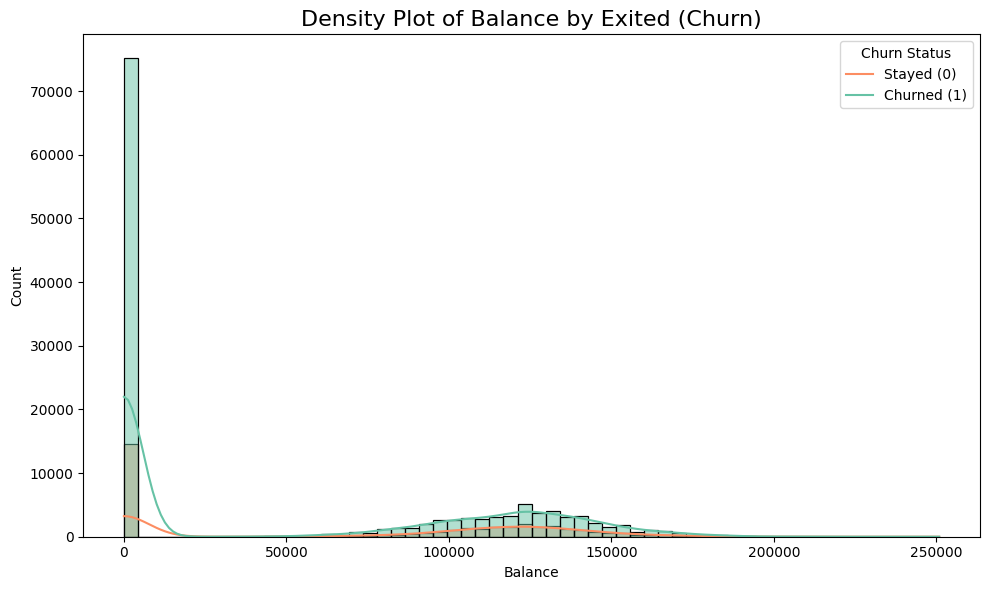

In [ ]:
# Create a histplot for Balance by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Balance', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Balance by Exited (Churn)', fontsize=16)
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

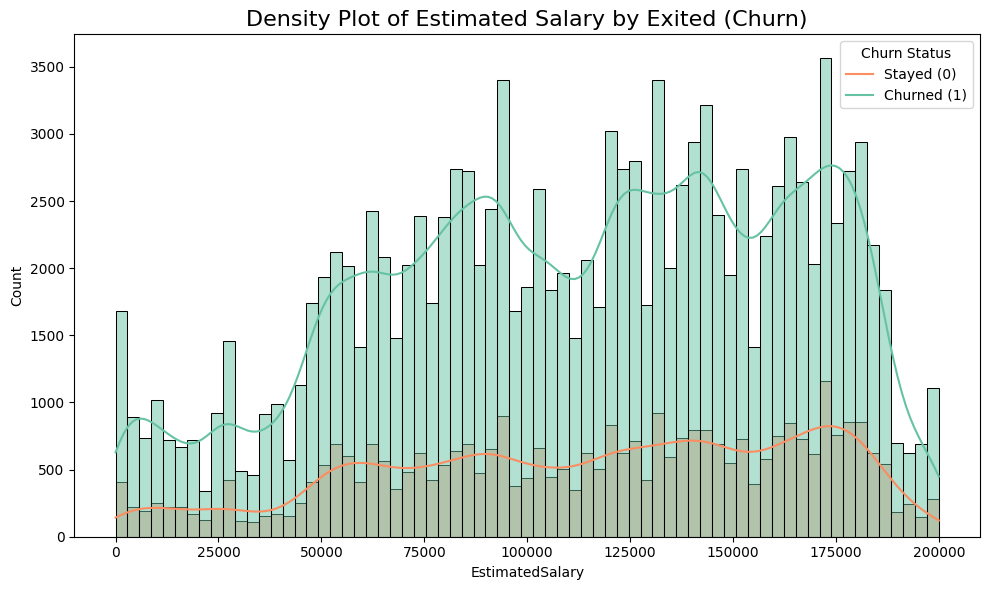

In [ ]:
# Create a histplot for EstimatedSalary by Exited
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='EstimatedSalary', hue='Exited', kde=True, fill=True, palette='Set2')
plt.title('Density Plot of Estimated Salary by Exited (Churn)', fontsize=16)
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.legend(title='Churn Status', labels=['Stayed (0)', 'Churned (1)'])
plt.tight_layout()
plt.show()

**Insights from the visualizations:**

1. **CreditScore vs. Exited:**
   - Churned customers tend to have slightly lower credit scores compared to those who stayed.
   - There is a noticeable concentration of churn around credit scores below 650.

2. **Age vs. Exited:**
   - Older customers, especially those aged above 40, show a higher tendency to churn.
   - Younger customers (under 30) are less likely to churn.

3. **Tenure vs. Exited:**
   - The tenure distribution is relatively even across both churned and non-churned customers.
   - Churn is slightly higher for customers with shorter tenures (below 5 years).

4. **Balance vs. Exited:**
   - Customers with either zero balance or very high balances tend to churn more.
   - Those with moderate balances appear to churn less frequently.

5. **Estimated Salary vs. Exited:**
   - Salary does not show a strong pattern with churn, suggesting it might not be a significant predictor.
   - Both churned and non-churned customers are evenly distributed across all salary levels.

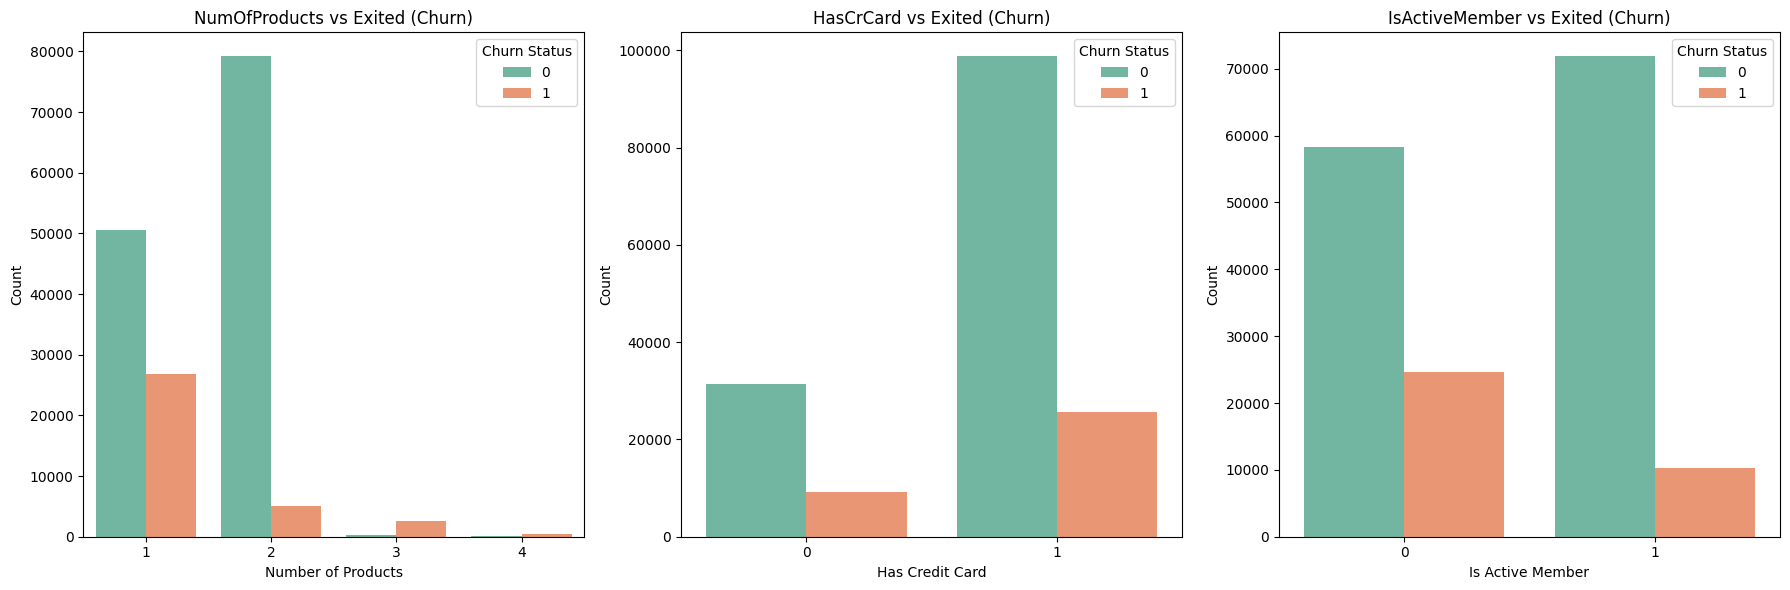

In [ ]:
plt.figure(figsize=(18, 6))

# Countplot for NumOfProducts vs Exited
plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='NumOfProducts', hue='Exited', palette='Set2')
plt.title('NumOfProducts vs Exited (Churn)')
plt.xlabel('Number of Products')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Countplot for HasCrCard vs Exited
plt.subplot(1, 3, 2)
sns.countplot(data=train_data, x='HasCrCard', hue='Exited', palette='Set2')
plt.title('HasCrCard vs Exited (Churn)')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.legend(title='Churn Status')

# Countplot for IsActiveMember vs Exited
plt.subplot(1, 3, 3)
sns.countplot(data=train_data, x='IsActiveMember', hue='Exited', palette='Set2')
plt.title('IsActiveMember vs Exited (Churn)')
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.legend(title='Churn Status')

plt.tight_layout()
plt.show()

**Insights from the visualizations:**

1. **Number of Products vs. Exited:**
   - Customers with **1 or 2 products** are more likely to stay, while those with **3 or more products** show a higher churn rate.
   - Having **4 products** corresponds to a high likelihood of churn, suggesting that managing multiple products may lead to dissatisfaction or complexity.

2. **Has Credit Card vs. Exited:**
   - Churn rates are similar regardless of whether a customer has a credit card, indicating that this feature may have limited predictive value.
   - Customers with or without credit cards churn at comparable rates.

3. **Is Active Member vs. Exited:**
   - **Active members** are far less likely to churn compared to inactive members.
   - This suggests that engagement plays a key role in customer retention, making this a strong predictor for churn.


## 4.3 Multivariate Analysis

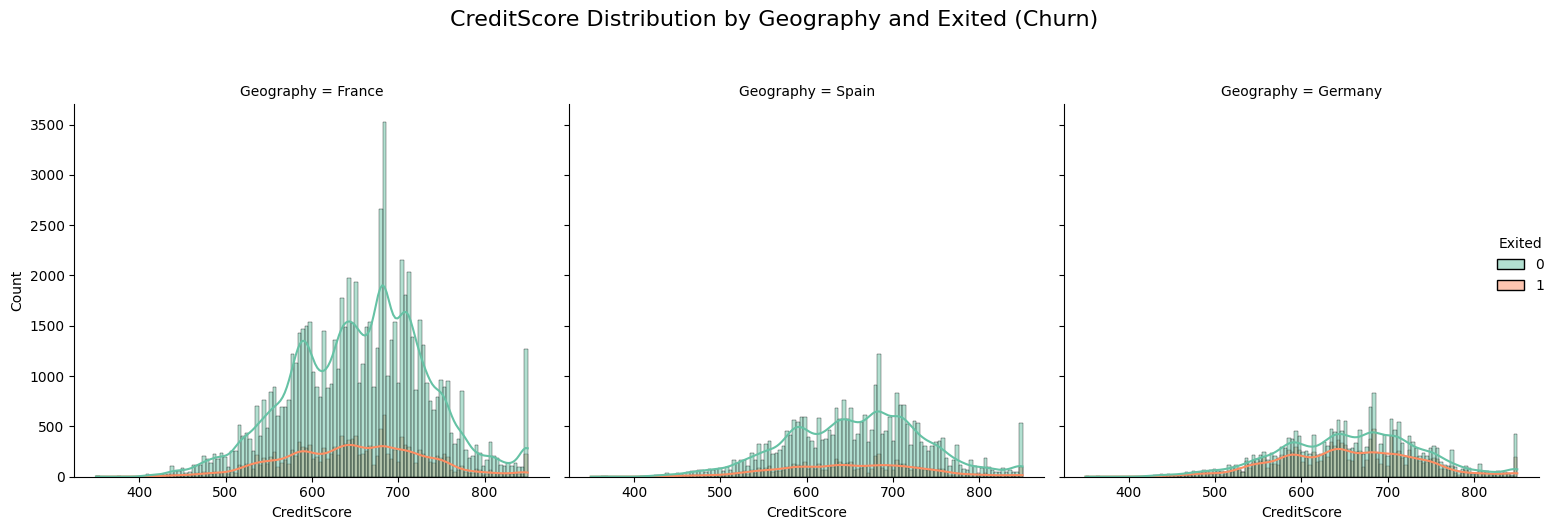

In [ ]:
# Create the displot
g = sns.displot(data=train_data, x="CreditScore", col="Geography", hue="Exited", kde=True, palette='Set2')
g.fig.suptitle('CreditScore Distribution by Geography and Exited (Churn)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

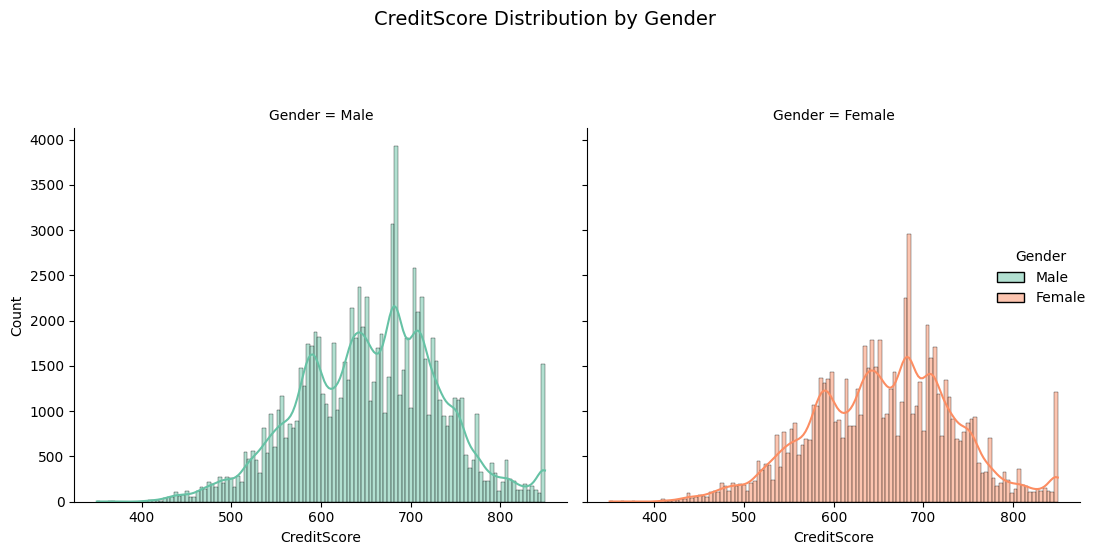

In [ ]:
# Create the displot
g = sns.displot(data=train_data, x="CreditScore", col="Gender", hue="Gender", kde=True, palette='Set2')
g.fig.suptitle('CreditScore Distribution by Gender', fontsize=14, y=1.10)
plt.tight_layout()
plt.show()

**Insights from the CreditScore Distribution by Geography, Gender, and Churn**

1. **CreditScore Distribution by Geography and Exited:**
   - **France**: The distribution of CreditScore is fairly even between churned and non-churned customers. However, churn seems slightly more common for scores below 650.
   - **Germany**: A higher proportion of churn is observed, especially among customers with CreditScores below 600.
   - **Spain**: The distribution resembles France, though churn is slightly less frequent, especially for scores above 700.

2. **CreditScore Distribution by Gender:**
   - Both **males and females** show similar distributions of CreditScore, with most scores clustering around 600 to 700.
   - No significant difference between genders is observed in terms of CreditScore distribution.

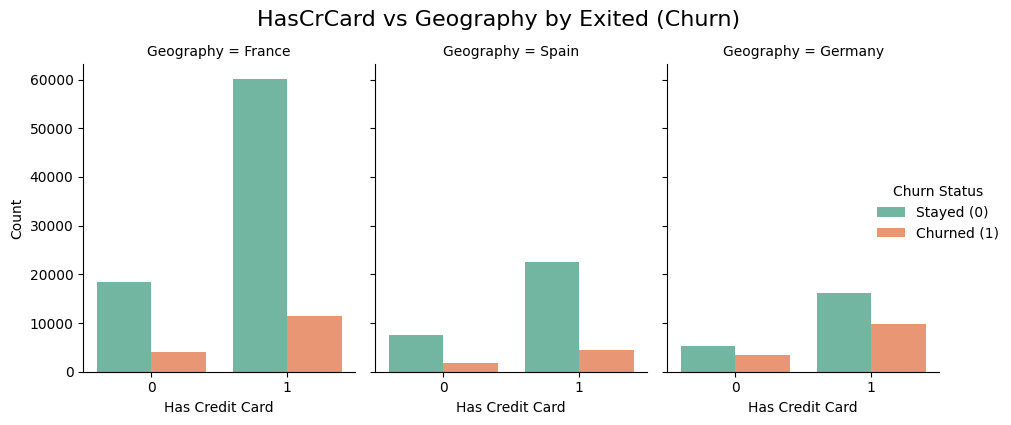

In [ ]:
# Create a catplot to visualize HasCrCard vs Geography by Exited
g = sns.catplot(
    data=train_data,
    x='HasCrCard',
    hue='Exited',
    col='Geography',
    kind='count',
    palette='Set2',
    height=4,
    aspect=0.8
)

g.fig.suptitle('HasCrCard vs Geography by Exited (Churn)', fontsize=16, y=1.05)
g.set_axis_labels('Has Credit Card', 'Count')
g._legend.set_title('Churn Status')
new_labels = ['Stayed (0)', 'Churned (1)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

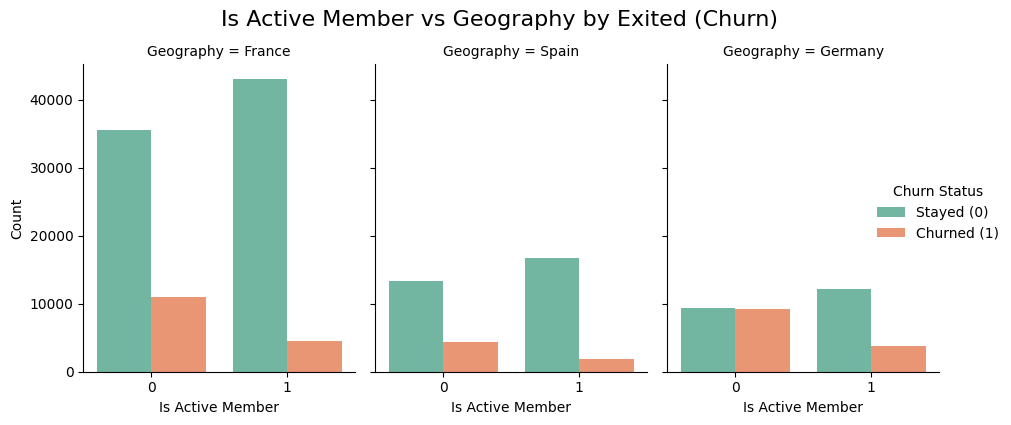

In [ ]:
# Create a catplot to visualize IsActiveMember vs Geography by Exited
g = sns.catplot(
    data=train_data,
    x='IsActiveMember',
    hue='Exited',
    col='Geography',
    kind='count',
    palette='Set2',
    height=4,
    aspect=0.8
)

g.fig.suptitle('Is Active Member vs Geography by Exited (Churn)', fontsize=16, y=1.05)
g.set_axis_labels('Is Active Member', 'Count')
g._legend.set_title('Churn Status')
new_labels = ['Stayed (0)', 'Churned (1)']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.show()

**Insights from the visualizations:**

HasCrCard vs Geography by Exited (Churn):
- **France and Spain**: Having a credit card or not doesn’t seem to have a significant impact on churn; the distributions look similar.
- **Germany**: There is a slightly higher churn rate among customers without a credit card, suggesting that credit card ownership may have some influence on customer retention.

IsActiveMember vs Geography by Exited (Churn):
- **Active members** have significantly lower churn rates across all regions (France, Germany, and Spain).
- **Inactive members** show much higher churn rates, indicating that customer engagement plays a crucial role in retention.
- **Germany** has the most pronounced difference in churn between active and inactive members.

## 5. Feature Engineering

Feature Creation:

* Balance_to_Age_Ratio: The ratio of balance to age to capture wealth across different age groups.
* Products_per_Year: The average number of products held per year to gauge product engagement.

In [ ]:
# Balance_to_Age_Ratio and Products_per_Year
train_data['Balance_to_Age_Ratio'] = train_data['Balance'] / (train_data['Age'] + 1e-5)
train_data['Products_per_Year'] = train_data['NumOfProducts'] / (train_data['Tenure'] + 1e-5)

test_data['Balance_to_Age_Ratio'] = test_data['Balance'] / (test_data['Age'] + 1e-5)
test_data['Products_per_Year'] = test_data['NumOfProducts'] / (test_data['Tenure'] + 1e-5)


In [ ]:
# Display the updated columns
print("After feature creation columns in train_data:\n", train_data.columns)
print("After feature creation columns in test_data:\n", test_data.columns)


After feature creation columns in train_data:
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Balance_to_Age_Ratio',
       'Products_per_Year'],
      dtype='object')
After feature creation columns in test_data:
 Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Balance_to_Age_Ratio',
       'Products_per_Year'],
      dtype='object')


## 6. Data Preprocessing

In [ ]:
# Drop irrelevant columns: 'id', 'CustomerId', 'Surname'
train_data = train_data.drop(['id', 'CustomerId', 'Surname'], axis=1)
test_data = test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)


***RowNumber, CustomerId, and Surname:*** These features are identifiers and do not influence churn prediction, so they can be ignored

In [ ]:
# Display the columns after dropping irrelevant ones
print("\nAfter dropping irrelevant columns in train_data:\n", train_data.columns)
print("After dropping irrelevant columns in test_data:\n", test_data.columns)



After dropping irrelevant columns in train_data:
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Balance_to_Age_Ratio', 'Products_per_Year'],
      dtype='object')
After dropping irrelevant columns in test_data:
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Balance_to_Age_Ratio', 'Products_per_Year'],
      dtype='object')


In [ ]:
# One-Hot Encoding for 'Geography'
train_data_encoded = pd.get_dummies(train_data, columns=['Geography'])
test_data_encoded = pd.get_dummies(test_data, columns=['Geography'])

# Binary Encoding for 'Gender'
train_data_encoded['Gender'] = train_data_encoded['Gender'].map({'Male': 0, 'Female': 1})
test_data_encoded['Gender'] = test_data_encoded['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows of the encoded train data
train_data_encoded.head()

CreditScore  Gender   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          668       0  33.0       3       0.00              2          1   
1          627       0  33.0       1       0.00              2          1   
2          678       0  40.0      10       0.00              2          1   
3          581       0  34.0       2  148882.54              1          1   
4          716       0  33.0       5       0.00              2          1   

   IsActiveMember  EstimatedSalary  Exited  Balance_to_Age_Ratio  \
0               0        181449.97       0              0.000000   
1               1         49503.50       0              0.000000   
2               0        184866.69       0              0.000000   
3               1         84560.88       0           4378.896947   
4               1         15068.83       0              0.000000   

   Products_per_Year  Geography_France  Geography_Germany  Geography_Spain  
0           0.666664              True              False            False  
1           1.999980              True              False            False  
2           0.200000              True              False            False  
3           0.499998              True              False            False  
4           0.399999             False              False             True

## 7. Correlation Heatmap

In [ ]:
correlation_matrix = train_data_encoded.corr()
correlation_matrix

CreditScore    Gender       Age    Tenure   Balance  \
CreditScore              1.000000 -0.002310 -0.008918  0.000942  0.006973   
Gender                  -0.002310  1.000000  0.063139 -0.008767  0.014699   
Age                     -0.008918  0.063139  1.000000 -0.010830  0.064318   
Tenure                   0.000942 -0.008767 -0.010830  1.000000 -0.009481   
Balance                  0.006973  0.014699  0.064318 -0.009481  1.000000   
NumOfProducts            0.011361 -0.026098 -0.102195  0.007335 -0.361033   
HasCrCard               -0.002828 -0.006418 -0.012111  0.005327 -0.018584   
IsActiveMember           0.014790 -0.033722  0.003320 -0.005532 -0.015073   
EstimatedSalary         -0.001820  0.007778 -0.005399  0.000971  0.008586   
Exited                  -0.027383  0.146442  0.340768 -0.019565  0.129743   
Balance_to_Age_Ratio     0.007451  0.002806 -0.126874 -0.007174  0.955975   
Products_per_Year        0.001685  0.004899  0.001635 -0.297087 -0.004885   
Geography_France        -0.005669 -0.026204 -0.066439  0.002960 -0.332811   
Geography_Germany        0.002996  0.039465  0.093138 -0.007751  0.539208   
Geography_Spain          0.003833 -0.007480 -0.012157  0.004085 -0.132364   

                      NumOfProducts  HasCrCard  IsActiveMember  \
CreditScore                0.011361  -0.002828        0.014790   
Gender                    -0.026098  -0.006418       -0.033722   
Age                       -0.102195  -0.012111        0.003320   
Tenure                     0.007335   0.005327       -0.005532   
Balance                   -0.361033  -0.018584       -0.015073   
NumOfProducts              1.000000   0.005482        0.039736   
HasCrCard                  0.005482   1.000000       -0.021034   
IsActiveMember             0.039736  -0.021034        1.000000   
EstimatedSalary           -0.004285   0.004438       -0.008080   
Exited                    -0.214554  -0.022141       -0.210237   
Balance_to_Age_Ratio      -0.342066  -0.016530       -0.008058   
Products_per_Year          0.045664  -0.011354       -0.000315   
Geography_France           0.063096   0.015839        0.017864   
Geography_Germany         -0.103034  -0.004988       -0.036433   
Geography_Spain            0.025889  -0.014037        0.014473   

                      EstimatedSalary    Exited  Balance_to_Age_Ratio  \
CreditScore                 -0.001820 -0.027383              0.007451   
Gender                       0.007778  0.146442              0.002806   
Age                         -0.005399  0.340768             -0.126874   
Tenure                       0.000971 -0.019565             -0.007174   
Balance                      0.008586  0.129743              0.955975   
NumOfProducts               -0.004285 -0.214554             -0.342066   
HasCrCard                    0.004438 -0.022141             -0.016530   
IsActiveMember              -0.008080 -0.210237             -0.008058   
EstimatedSalary              1.000000  0.018827              0.008983   
Exited                       0.018827  1.000000              0.055687   
Balance_to_Age_Ratio         0.008983  0.055687              1.000000   
Products_per_Year            0.003435  0.003684             -0.004982   
Geography_France            -0.002085 -0.130797             -0.303761   
Geography_Germany            0.013298  0.211054              0.492120   
Geography_Spain             -0.010587 -0.051175             -0.120788   

                      Products_per_Year  Geography_France  Geography_Germany  \
CreditScore                    0.001685         -0.005669           0.002996   
Gender                         0.004899         -0.026204           0.039465   
Age                            0.001635         -0.066439           0.093138   
Tenure                        -0.297087          0.002960          -0.007751   
Balance                       -0.004885         -0.332811           0.539208   
NumOfProducts                  0.045664          0.063096          -0.103034   
Has

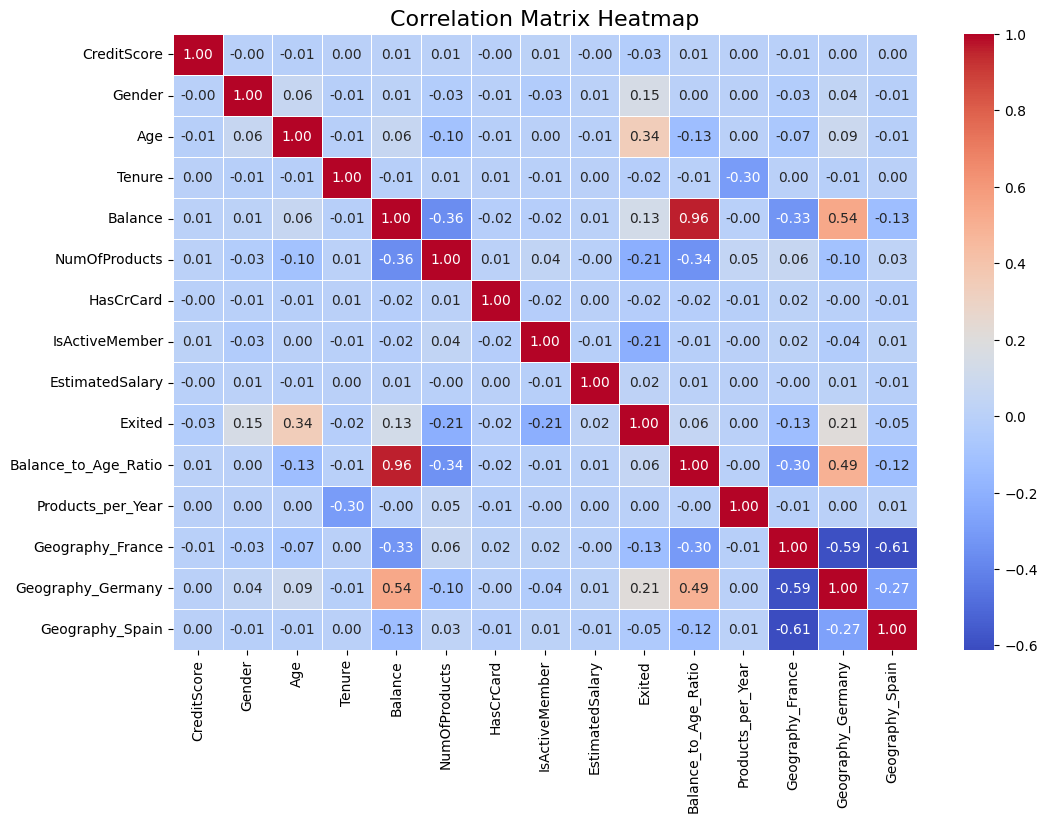

In [ ]:
# Calculate the correlation matrix
correlation_matrix = train_data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

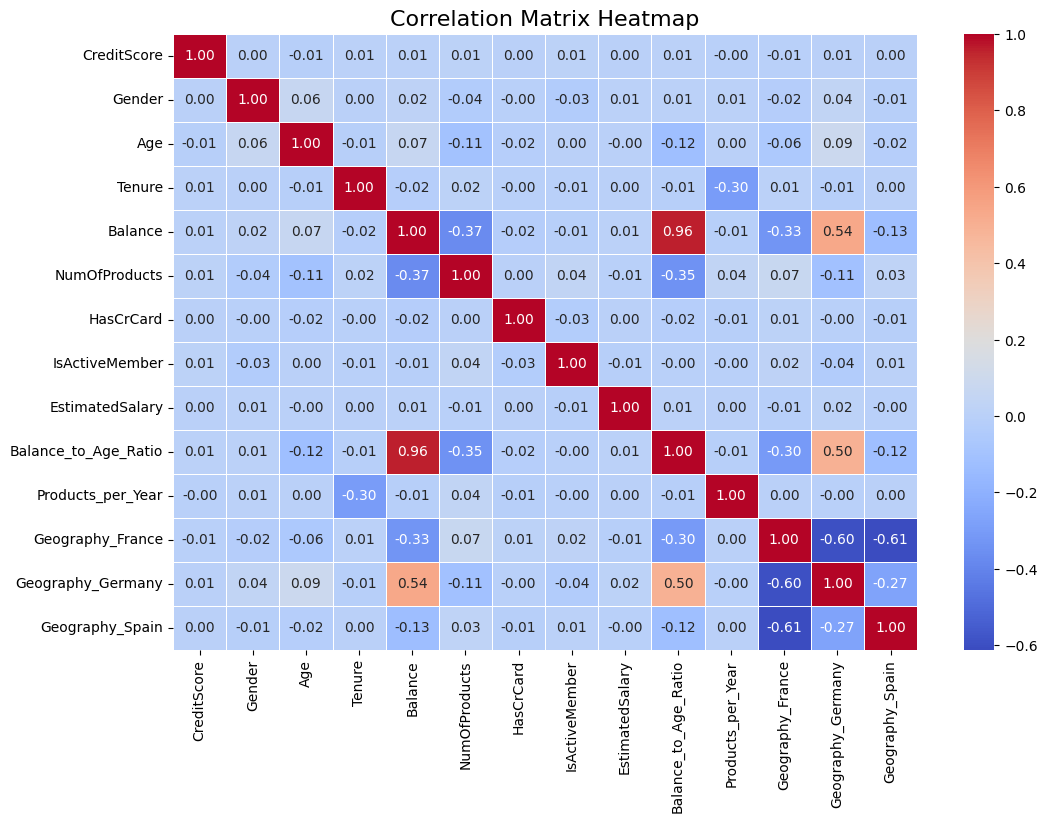

In [ ]:
# Calculate the correlation matrix
correlation_matrix = test_data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [ ]:
# Dropping one of the highly correlated feature
train_data_encoded = train_data_encoded.drop('Balance', axis=1)
test_data_encoded = test_data_encoded.drop('Balance', axis=1)

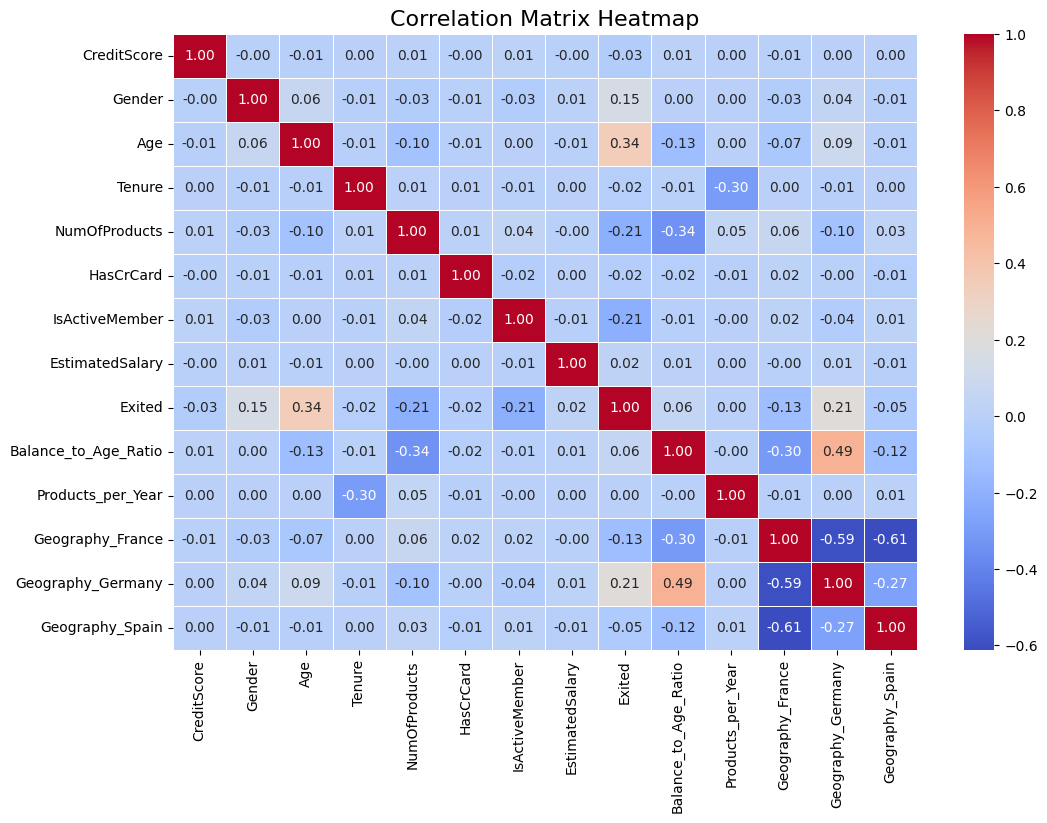

In [ ]:
# Calculate the correlation matrix again
correlation_matrix = train_data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

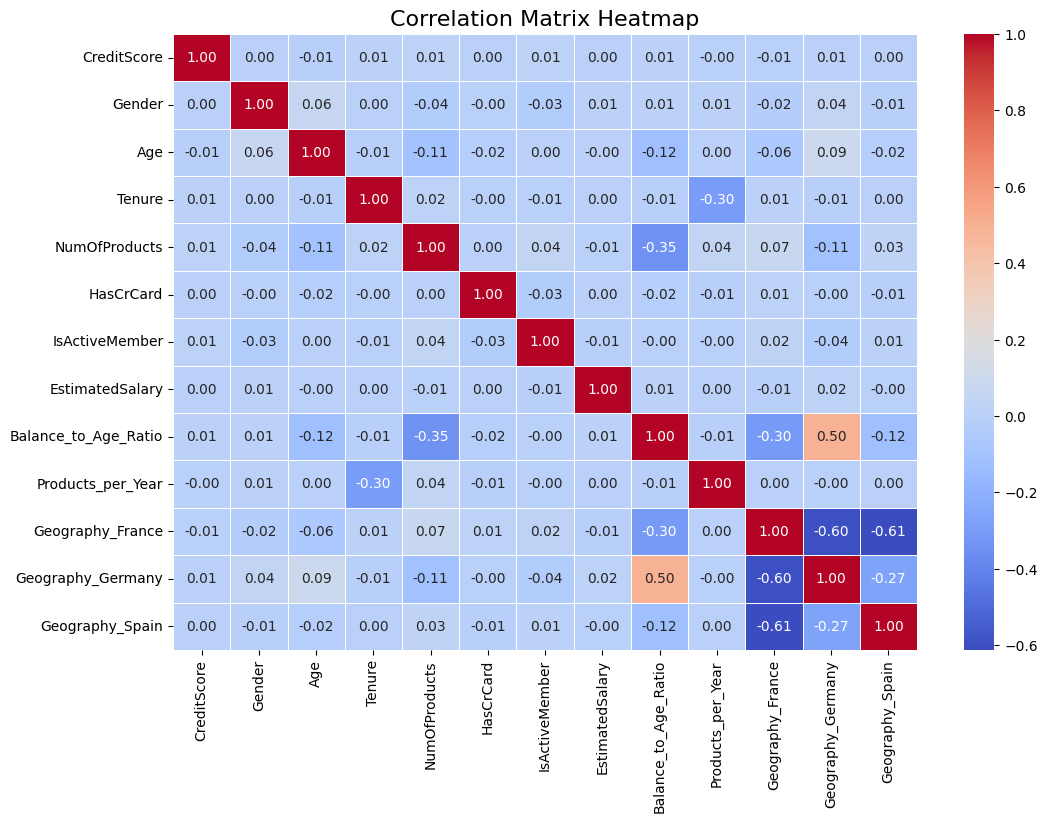

In [ ]:
# Calculate the correlation matrix again
correlation_matrix = test_data_encoded.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## 8. Modeling

In [ ]:
# Check the balance of the target variable (Exited)
class_counts = train_data_encoded['Exited'].value_counts()
print(class_counts)

Exited
0    130113
1     34921
Name: count, dtype: int64


The data distribution for the target variable is not balanced. Before modelling it is necessary to reduce skewness.

In [ ]:
# Define the features and target
X = train_data_encoded.drop('Exited', axis=1)
y = train_data_encoded['Exited']

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

# Combine back to a DataFrame if needed
train_data_encoded = pd.concat([X, y], axis=1)

# Check the balance of the target variable (Exited) for balancing check
class_counts = train_data_encoded['Exited'].value_counts()
print(class_counts)

Exited
0    34921
1    34921
Name: count, dtype: int64


The training dataset is now balanced.

In [ ]:
# Separate features and target from the train dataset
X = train_data_encoded.drop('Exited', axis=1)
y = train_data_encoded['Exited']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

In [ ]:
# Use RobustScaler to handle outliers
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Update models to handle class imbalance
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1),
    "XGBoost": xgb.XGBClassifier(scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
                                  use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": lgb.LGBMClassifier(class_weight='balanced', verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(class_weights=[(y_train == 0).sum() / len(y_train),
                                                  (y_train == 1).sum() / len(y_train)],
                                   verbose=0, random_state=42)
}

In [ ]:
# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    report = classification_report(y_val, y_pred, output_dict=True)

    results[name] = {
        "Accuracy": accuracy,
        "AUC": auc,
        "Report": pd.DataFrame(report).T
    }

results_df = pd.DataFrame({
    name: {"Accuracy": results[name]["Accuracy"], "AUC": results[name]["AUC"]}
    for name in results
}).T

print("\nModel Evaluation Results:\n", results_df)

for name in results:
    print(f"\nClassification Report for {name}:\n")
    print(results[name]["Report"])

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training XGBoost...
Training LightGBM...
Training CatBoost...

Model Evaluation Results:
                      Accuracy       AUC
Logistic Regression  0.746152  0.818280
Decision Tree        0.725678  0.725716
Random Forest        0.794617  0.877063
XGBoost              0.801274  0.886122
LightGBM             0.806142  0.890837
CatBoost             0.806214  0.889841

Classification Report for Logistic Regression:

              precision    recall  f1-score       support
0              0.739601  0.756613  0.748010   6956.000000
1              0.752955  0.735776  0.744267   7013.000000
accuracy       0.746152  0.746152  0.746152      0.746152
macro avg      0.746278  0.746195  0.746138  13969.000000
weighted avg   0.746305  0.746152  0.746131  13969.000000

Classification Report for Decision Tree:

              precision    recall  f1-score       support
0              0.725657  0.722110  0.723880   69

In [ ]:
# Re-split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Use RobustScaler again
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Hyperparameter Tuning with Optuna

In [ ]:
# Optuna objective function for RandomForest
def rf_objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    y_prob = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_prob)
    return auc



In [ ]:
# Optuna objective function for CatBoost
def catboost_objective(trial):
    depth = trial.suggest_int('depth', 4, 10)
    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.3, log=True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1, 10)
    iterations = trial.suggest_int('iterations', 100, 500)

    model = CatBoostClassifier(
        depth=depth,
        learning_rate=learning_rate,
        l2_leaf_reg=l2_leaf_reg,
        iterations=iterations,
        class_weights=[(y_train == 0).sum() / len(y_train), (y_train == 1).sum() / len(y_train)],
        verbose=0,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_prob)
    return auc

In [ ]:
# Run Optuna studies to find the best hyperparameters
print("Optimizing Random Forest...")
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(rf_objective, n_trials=20)

print(f"Best Random Forest AUC: {rf_study.best_value}")
print(f"Best Random Forest Hyperparameters: {rf_study.best_params}")

print("\nOptimizing CatBoost...")
catboost_study = optuna.create_study(direction='maximize')
catboost_study.optimize(catboost_objective, n_trials=20)

print(f"Best CatBoost AUC: {catboost_study.best_value}")
print(f"Best CatBoost Hyperparameters: {catboost_study.best_params}")

[I 2024-10-24 11:12:07,409] A new study created in memory with name: no-name-0234c5da-c2ee-4e16-be16-9c98cbf89734


Optimizing Random Forest...


[I 2024-10-24 11:12:29,387] Trial 0 finished with value: 0.8885980111527044 and parameters: {'n_estimators': 370, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8885980111527044.
[I 2024-10-24 11:13:03,091] Trial 1 finished with value: 0.8860931747800662 and parameters: {'n_estimators': 455, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8885980111527044.
[I 2024-10-24 11:13:26,806] Trial 2 finished with value: 0.8888180801496801 and parameters: {'n_estimators': 472, 'max_depth': 10, 'min_samples_split': 13, 'min_samples_leaf': 1}. Best is trial 2 with value: 0.8888180801496801.
[I 2024-10-24 11:13:44,688] Trial 3 finished with value: 0.8888757443561439 and parameters: {'n_estimators': 354, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.8888757443561439.
[I 2024-10-24 11:14:02,241] Trial 4 finished with value: 0.8867243856742841 and parameters

Best Random Forest AUC: 0.8890172092295201
Best Random Forest Hyperparameters: {'n_estimators': 303, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 3}

Optimizing CatBoost...


[I 2024-10-24 11:17:39,513] Trial 0 finished with value: 0.8917249670311613 and parameters: {'depth': 5, 'learning_rate': 0.1952463977976356, 'l2_leaf_reg': 1.0944968308906478, 'iterations': 177}. Best is trial 0 with value: 0.8917249670311613.
[I 2024-10-24 11:17:43,633] Trial 1 finished with value: 0.87238315608235 and parameters: {'depth': 4, 'learning_rate': 0.0017547339673643727, 'l2_leaf_reg': 5.786123545351095, 'iterations': 232}. Best is trial 0 with value: 0.8917249670311613.
[I 2024-10-24 11:17:50,125] Trial 2 finished with value: 0.8915180790099254 and parameters: {'depth': 7, 'learning_rate': 0.03154686867985465, 'l2_leaf_reg': 6.432000464260166, 'iterations': 394}. Best is trial 0 with value: 0.8917249670311613.
[I 2024-10-24 11:18:01,307] Trial 3 finished with value: 0.88973239503372 and parameters: {'depth': 10, 'learning_rate': 0.005175307397756586, 'l2_leaf_reg': 7.787756759070509, 'iterations': 234}. Best is trial 0 with value: 0.8917249670311613.
[I 2024-10-24 11:18:

Best CatBoost AUC: 0.8917775269406436
Best CatBoost Hyperparameters: {'depth': 5, 'learning_rate': 0.1052667277943049, 'l2_leaf_reg': 3.775242984771314, 'iterations': 172}


## Train final models with the best hyperparameters from Optuna

In [ ]:
# Use the best hyperparameters found by Optuna for RandomForest
best_rf_params = rf_study.best_params
best_rf = RandomForestClassifier(
    n_estimators=best_rf_params['n_estimators'],
    max_depth=best_rf_params['max_depth'],
    min_samples_split=best_rf_params['min_samples_split'],
    min_samples_leaf=best_rf_params['min_samples_leaf'],
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=3, min_samples_split=17,
                       n_estimators=303, n_jobs=-1, random_state=42)

In [ ]:
# Use the best hyperparameters found by Optuna for CatBoost
best_catboost_params = catboost_study.best_params
best_catboost = CatBoostClassifier(
    depth=best_catboost_params['depth'],
    learning_rate=best_catboost_params['learning_rate'],
    l2_leaf_reg=best_catboost_params['l2_leaf_reg'],
    iterations=best_catboost_params['iterations'],
    class_weights=[(y_train == 0).sum() / len(y_train), (y_train == 1).sum() / len(y_train)],
    verbose=0,
    random_state=42
)
best_catboost.fit(X_train, y_train)

In [ ]:
# Evaluate both models on the validation set
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    accuracy = accuracy_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    report = classification_report(y_val, y_pred, output_dict=True)
    return accuracy, auc, pd.DataFrame(report).T

In [ ]:
print("Evaluating the best Random Forest model...")
rf_accuracy, rf_auc, rf_report = evaluate_model(best_rf, X_val, y_val)
print(f"Random Forest - Accuracy: {rf_accuracy}, AUC: {rf_auc}\n")
print(rf_report)

Evaluating the best Random Forest model...
Random Forest - Accuracy: 0.8045672560670055, AUC: 0.8890172092295201

              precision    recall  f1-score       support
0              0.801513  0.807504  0.804497   6956.000000
1              0.807643  0.801654  0.804637   7013.000000
accuracy       0.804567  0.804567  0.804567      0.804567
macro avg      0.804578  0.804579  0.804567  13969.000000
weighted avg   0.804590  0.804567  0.804568  13969.000000


In [ ]:
print("\nEvaluating the best CatBoost model...")
catboost_accuracy, catboost_auc, catboost_report = evaluate_model(best_catboost, X_val, y_val)
print(f"CatBoost - Accuracy: {catboost_accuracy}, AUC: {catboost_auc}\n")
print(catboost_report)


Evaluating the best CatBoost model...
CatBoost - Accuracy: 0.8082181974371824, AUC: 0.8917775269406436

              precision    recall  f1-score       support
0              0.803462  0.813974  0.808684   6956.000000
1              0.813060  0.802510  0.807750   7013.000000
accuracy       0.808218  0.808218  0.808218      0.808218
macro avg      0.808261  0.808242  0.808217  13969.000000
weighted avg   0.808281  0.808218  0.808215  13969.000000


In [ ]:
# Choose the best model based on AUC
best_final_model = best_catboost if catboost_auc > rf_auc else best_rf
print(f"\nBest model for submission: {'CatBoost' if catboost_auc > rf_auc else 'Random Forest'}")



Best model for submission: CatBoost


Using CatBoost model for SHAP analysis...
Generating SHAP summary plot...


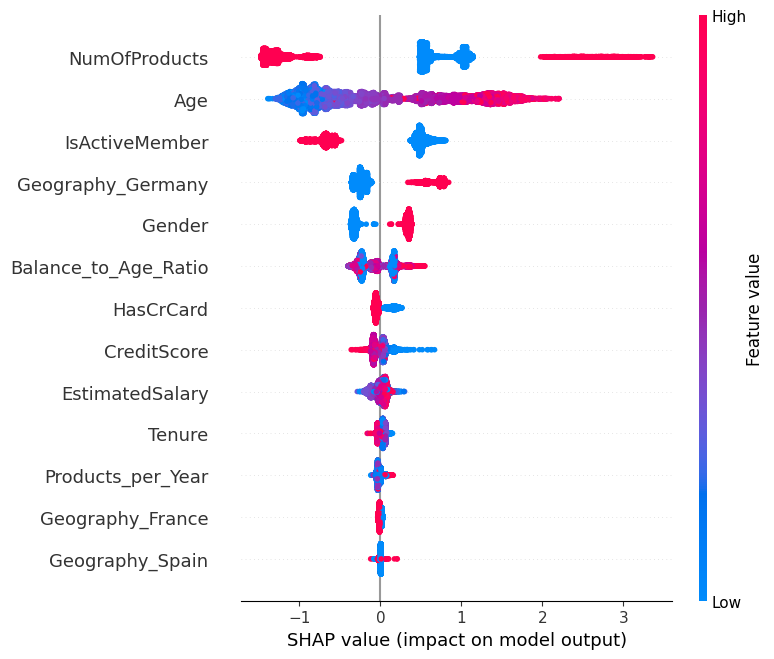

Generating SHAP bar plot...


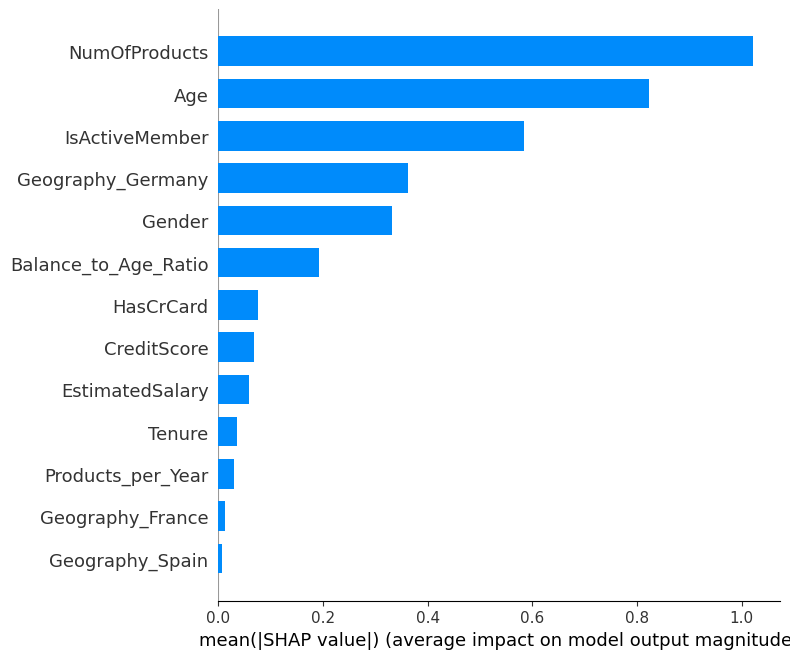

Generating SHAP dependence plot for Balance_to_Age_Ratio...


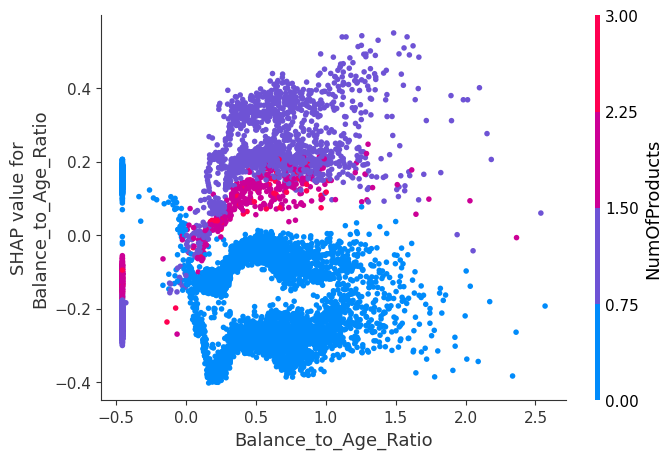

In [ ]:
# Select the best model for SHAP analysis (CatBoost or RandomForest)
if isinstance(best_final_model, CatBoostClassifier):
    print("Using CatBoost model for SHAP analysis...")
    explainer = shap.TreeExplainer(best_final_model)
else:
    print("Using Random Forest model for SHAP analysis...")
    explainer = shap.TreeExplainer(best_final_model)

# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# Summary Plot (Feature Importance Overview)
print("Generating SHAP summary plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_val, feature_names=X.columns)
plt.show()

# Bar Plot for Global Feature Importance
print("Generating SHAP bar plot...")
shap.summary_plot(shap_values, X_val, plot_type="bar", feature_names=X.columns)
plt.show()

# SHAP Dependence Plot for a Key Feature
key_feature = "Balance_to_Age_Ratio"
print(f"Generating SHAP dependence plot for {key_feature}...")
shap.dependence_plot(key_feature, shap_values, X_val, feature_names=X.columns)


## 9. Colab Interactive Dashboard

In [ ]:
# Use wget to download the CSV file from Google Sheets
!wget --output-file="logs.txt" "https://docs.google.com/spreadsheets/d/1PTM7FXIquDzxf30Yd-e0pS6CER6uh4v9KbBTkzv3a1w/export?format=csv" -O "train.csv"

# Define the path to the downloaded CSV file
url = 'train.csv'

# Read the CSV file into a DataFrame
try:
    train_data = pd.read_csv(url)
    print(train_data.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2          1               0        181449.97   
1       0.00              2          1               1         49503.50   
2       0.00              2          1               0        184866.69   
3  148882.54              1          1               1         84560.88   
4       0.00              2          1               1         15068.83   

   Exited  
0       0  
1       0  
2       0  
3       0  
4 

In [ ]:
# Checking the Variables of train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  int64  
 11  IsActiveMember   165034 non-null  int64  
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 17.6+ MB


In [ ]:
# Use wget to download the CSV file from Google Sheets
!wget --output-file="logs.txt" "https://docs.google.com/spreadsheets/d/1m2Y_w7DIuJEE4q2PIfPj3sDTfbjkBuhs3CVNpr0IJ6U/export?format=csv" -O "test.csv"

# Define the path to the downloaded CSV file
url = 'test.csv'

# Read the CSV file into a DataFrame
try:
    test_data = pd.read_csv(url)
    print(test_data.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

       id  CustomerId    Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898   Lucchese          586    France  Female  23.0       2   
1  165035    15782418       Nott          683    France  Female  46.0       2   
2  165036    15807120         K?          656    France  Female  34.0       7   
3  165037    15808905  O'Donnell          681    France    Male  36.0       8   
4  165038    15607314    Higgins          752   Germany    Male  38.0      10   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0       0.00              2          0               1        160976.75  
1       0.00              1          1               0         72549.27  
2       0.00              2          1               0        138882.09  
3       0.00              1          1               0        113931.57  
4  121263.62              1          1               0        139431.00  


In [ ]:
# Checking the Variables of test_data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  int64  
 11  IsActiveMember   110023 non-null  int64  
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 10.9+ MB


In [ ]:
# Prepare the test data for visualization
test_data_scaled = scaler.transform(test_data_encoded)

# Make predictions on the test set using the best model
y_test_prob = best_final_model.predict_proba(test_data_scaled)[:, 1]

In [ ]:
print(type(y_test_prob))

<class 'numpy.ndarray'>


In [ ]:
# y_test_prob contains predicted probabilities, convert to binary values (0 or 1)
y_test_pred = (y_test_prob >= 0.5).astype(int)  # Assuming threshold of 0.5 for classification

# Add the predicted values as a new column in test_data
test_data['Exited'] = y_test_pred

# Check the updated dataset
test_data.head(3)

id  CustomerId   Surname  CreditScore Geography  Gender   Age  Tenure  \
0  165034    15773898  Lucchese          586    France  Female  23.0       2   
1  165035    15782418      Nott          683    France  Female  46.0       2   
2  165036    15807120        K?          656    France  Female  34.0       7   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      0.0              2          0               1        160976.75       0  
1      0.0              1          1               0         72549.27       1  
2      0.0              2          1               0        138882.09       0

In [ ]:
!pip install plotly ipywidgets

In [ ]:
# Step 2: Import Libraries
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
from ipywidgets import widgets, interact, Tab, VBox
from google.colab import output
output.enable_custom_widget_manager()

# Step 4: Create Dataset Mapping and Dropdown
datasets = {
    'Train Data': train_data,
    'Test Data': test_data
}

dataset_dropdown = widgets.Dropdown(
    options=list(datasets.keys()),
    value='Train Data',
    description='Dataset:',
)

def get_dataset(name):
    return datasets[name]

# Step 5: Define Visualization Functions

# Bar Plot for Distribution of Exited
def plot_exited_distribution(dataset_name):
    dataset = get_dataset(dataset_name)
    exited_counts = dataset['Exited'].value_counts().reset_index()
    exited_counts.columns = ['Exited', 'Count']
    fig = px.bar(exited_counts,
                 x='Exited', y='Count', color='Exited',
                 title='Distribution of Exited Customers',
                 labels={'Exited': 'Exited (0 = No, 1 = Yes)', 'Count': 'Count'})
    fig.show()

# Bar Plot for Customer Age Distribution
def plot_age_distribution(dataset_name):
    dataset = get_dataset(dataset_name)
    fig = px.histogram(dataset, x='Age', title='Customer Age Distribution',
                       labels={'Age': 'Customer Age'}, nbins=30)
    fig.show()

# Pie Chart for Gender Distribution
def plot_gender_distribution(dataset_name):
    dataset = get_dataset(dataset_name)
    fig = px.pie(dataset, names='Gender', title='Gender Distribution of Customers',
                 labels={'Gender': 'Gender'})
    fig.show()

# Pie Chart for Geography Distribution
def plot_geography_distribution(dataset_name):
    dataset = get_dataset(dataset_name)
    fig = px.pie(dataset, names='Geography', title='Geography Distribution of Customers',
                 labels={'Geography': 'Geography'})
    fig.show()

# Step 6: Create Interactive Widgets without direct usage of `interact`
exited_widget = interact(plot_exited_distribution, dataset_name=dataset_dropdown)
age_widget = interact(plot_age_distribution, dataset_name=dataset_dropdown)
gender_widget = interact(plot_gender_distribution, dataset_name=dataset_dropdown)
geography_widget = interact(plot_geography_distribution, dataset_name=dataset_dropdown)

# Step 7: Organize the Dashboard Using Tabs
tab1 = VBox([widgets.Label("Exited Distribution"), exited_widget.widget])
tab2 = VBox([widgets.Label("Age Distribution"), age_widget.widget])
tab3 = VBox([widgets.Label("Gender Distribution"), gender_widget.widget])
tab4 = VBox([widgets.Label("Geography Distribution"), geography_widget.widget])

# Create the tab layout
dashboard = Tab(children=[tab1, tab2, tab3, tab4])
dashboard.set_title(0, 'Exited Distribution')
dashboard.set_title(1, 'Age Distribution')
dashboard.set_title(2, 'Gender Distribution')
dashboard.set_title(3, 'Geography Distribution')

# Display the complete dashboard
dashboard

interactive(children=(Dropdown(description='Dataset:', options=('Train Data', 'Test Data'), value='Train Data'…

interactive(children=(Dropdown(description='Dataset:', options=('Train Data', 'Test Data'), value='Train Data'…

interactive(children=(Dropdown(description='Dataset:', options=('Train Data', 'Test Data'), value='Train Data'…

interactive(children=(Dropdown(description='Dataset:', options=('Train Data', 'Test Data'), value='Train Data'…

## 10. Submission Preparation

In [ ]:
submission = test_data[['id', 'Exited']]

# Step 2: Save the Submission File Based on User Input
user_input = input("Do you want to download the submission file? (Y/N): ")

if user_input.strip().upper() == 'Y':
    # Save as 'submission.csv'
    submission.to_csv('submission.csv', index=False)
    from google.colab import files
    files.download('submission.csv')
    print("The file has been downloaded successfully.")
else:
    print("File download skipped.")

Do you want to download the submission file? (Y/N): Y


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The file has been downloaded successfully.
